In [1]:
# !git clone https://github.com/pengzhiliang/MAE-pytorch
# !wget https://image-net.org/data/tiny-imagenet-200.zip
# !rm myfuc/trains.py
# !rm tinydata/*.png
# !pip install --user --process-dependency-links -e 

In [2]:
from torchvision import transforms
from PIL import Image
import os,glob
import re
from myfuc import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

!pwd
dataLoader=readWTData()
datasetMaker=makeDataset()
print(torch.cuda.is_available())



/export/work/kamomes/Research
True


In [3]:
w, h=7,4
def quan(a:"numpyArray",q=10):
    return np.round(a/q)#.astype("int")

In [12]:
[1]+[2]

[1, 2]

   BARBARA rmse: 2.826484153002466
   BARBARA rmse: 2.6403616075922685
   BARBARA rmse: 2.9357422732501903
   BARBARA rmse: 2.902463392546429
   BARBARA rmse: 2.9332627375695974
   BARBARA rmse: 2.9606093200074057
   BARBARA rmse: 2.9785872604202193
   BARBARA rmse: 2.978502732765556
   BARBARA rmse: 3.0150071456033958
   BARBARA rmse: 3.002339929033494
Data amount = 40762
ori.shape = (8, 16)


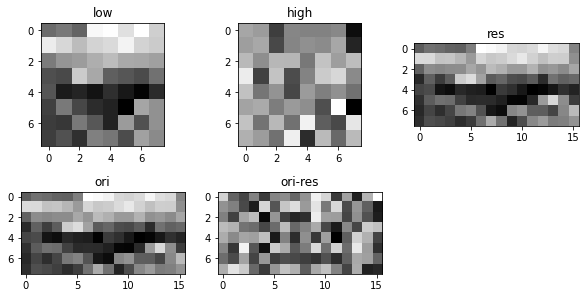

In [30]:
# Vali set
dataLoader=readWTData()
datasetMaker=makeDataset()
in_list=glob.glob("ppwOut_New_5_Q/val/*/")[0:1]+glob.glob("ppwOut_New_5_Q/val/*/")[2:]
# in_list=['ppwOut_New_5_Q/val/BOAT/', 'ppwOut_New_5_Q/val/LENNA/', 'ppwOut_New_5_Q/val/BARBARA/']
in_ori="ppwOut_New_5_NOQ"
# 0boat 1lenna 2monkey 3bird 4barba
imgind=4
normType=2
# for path0 in in_list:
for path0 in in_list[imgind:imgind+1]:
    for lv in range(0,5):
        imgName=re.findall("\w+/",path0)[-1][:-1]
        
        pathLow=path0+"ewpLH-LCoefR_%d.dig"%lv
        pathHigh=path0+"ewpLH-HCoef_%d.dig"%lv
        pathRes=path0+"ewpLH-ImageR_%d.dig"%lv
        pathOri=in_ori+path0[path0.find("/"):]+"ewpLH-ImageR_%d.dig"%lv
        low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        print("%10s rmse:"%imgName,rmse(ori,res))
        norm=datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)

        pathLow=path0+"ewpHL-LCoefR_%d.dig"%lv
        pathHigh=path0+"ewpHL-HCoef_%d.dig"%lv
        pathRes=path0+"ewpHL-ImageR_%d.dig"%lv
        pathOri=in_ori+path0[path0.find("/"):]+"ewpHL-ImageR_%d.dig"%lv
        low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        print("%10s rmse:"%imgName,rmse(ori,res))
        norm=datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)
    
        # pathLow=path0+"ewpHH-LCoefR_%d.dig"%lv
        # pathHigh=path0+"ewpHH-HCoef_%d.dig"%lv
        # pathRes=path0+"ewpHH-ImageR_%d.dig"%lv
        # pathOri=in_ori+path0[path0.find("/"):]+"ewpHH-ImageR_%d.dig"%lv
        # low,high,res,ori=dataLoader.makeImg(pathLow,pathHigh,pathRes,pathOri) # target is high
        # print("%10s rmse:"%imgName,rmse(ori,res))
        # datasetMaker.myN2(low,high,ori,res,width=w, height=h-1,normType=normType)

valData=datasetMaker.out()
datasetMaker.plot(low,high,ori,res,5)

In [31]:
40762*9

366858

In [32]:
device="cpu"
modelBest=Net_CNN(w*h,0)
# modelBest=Net_CNN_simp(w*h,0)
# bestPath=sorted(glob.glob("my_74_2H_dp45_norm2_lr2_net2/best*.pt"))[-1]
# bestPath=sorted(glob.glob("my_74_2H_dp3_norm2_lr2_net1/best*.pt"))[-1]
bestPath=sorted(glob.glob("my_74_2H_dp45_norm2_lr2_net1/best*.pt"))[-1]
bestPath=sorted(glob.glob("my_74_2H_dp45_norm2_lr2_batch64/best*.pt"))[-1]
print(bestPath)
modelBest.load_state_dict(torch.load(bestPath, map_location=device)['state_dict'])

my_74_2H_dp45_norm2_lr2_batch64/best011.pt


<All keys matched successfully>

In [33]:
# utilize
plotN=len(valData)
vali_loader2=DataLoader(valData,batch_size=plotN,shuffle=0)
x, target = next(iter(vali_loader2))

y=modelBest(x).detach().numpy()
target=target.numpy()

# y2=y.reshape((-1,128//1-3))
# high2=high.copy()
# high2[h-1:,1:-2]=y2*1

No handles with labels found to put in legend.


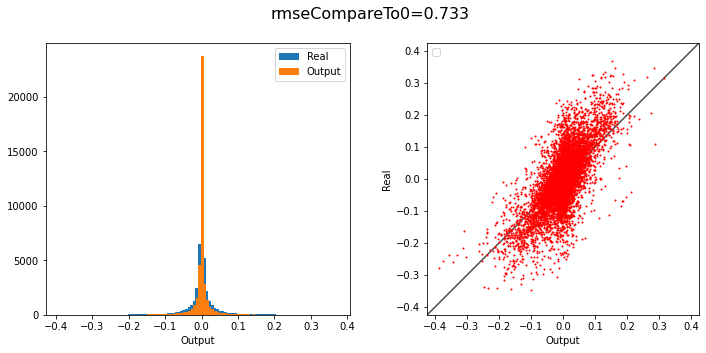

In [34]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("rmseCompareTo0=%0.3f"%(rmse(y,target)/rmse(target,0)),fontsize=16)
ax=axes[1]
# ax.plot(y,target,"r.")
ax.scatter(y,target,color="r",s=1)
plim=np.maximum(np.abs(np.min([ax.get_xlim(), ax.get_ylim()])),np.abs(np.max([ax.get_xlim(), ax.get_ylim()])))
lims = [-plim,plim]
ax.plot(lims, lims, 'k-', alpha=0.7, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("Output")
ax.set_ylabel("Real")
ax.legend()

ax=axes[0]
ax.hist(target,bins=100,label="Real")
ax.hist(y,bins=100,label="Output")
ax.set_xlabel("Output")
ax.legend()


# plt.savefig("data9_norm2_nett_boat.png")
# plt.savefig("data9_norm2_nett_lenna.png")
# plt.savefig("data9_norm2_nett_monkey.png")
# plt.savefig("data9_norm2_nett_bird.png")
# plt.savefig("data9_norm2_nett_barba.png")
plt.show()

In [35]:
print(rmse(y,target)/rmse(target,0),atan(y,target)/atan(target,0),mae(y,target)/mae(target,0))

0.73265624 0.781169 0.779455


In [128]:
print(rmse(y,target)/rmse(target,0),atan(y,target)/atan(target,0),mae(y,target)/mae(target,0))

2241.555 121.47865 4414.24


In [ ]:
0.681 0.810 0.968 0.805 0.740

In [116]:
# regression
print("Boat, Lenna, Barbara")
print("deep:",0.668,0.82,0.708)

Boat, Lenna, Barbara
deep: 0.668 0.82 0.708


In [ ]:
# from matplotlib.colors import ListedColormap

# s=5
# color = plt.get_cmap('PiYG')
# vm=50*5440/428.34
# plt.figure(figsize=(s*3,s*2))
# plt.subplot(241)
# plt.imshow(high,cmap=color,vmin=-vm, vmax=vm)
# plt.title("Origin")
# # plt.colorbar()
# plt.subplot(242)
# plt.imshow(high2,cmap=color,vmin=-vm, vmax=vm)
# plt.title("Out")
# # plt.colorbar()
# plt.subplot(243)
# plt.imshow(high-high2,cmap=color,vmin=-vm, vmax=vm)
# plt.title("Diff")
# plt.subplot(244)
# plt.colorbar()


In [90]:
def psnr(rmse):
    return 20*np.log10((255**2-1)**2/rmse)


In [69]:
#SAVE MODEL
for name, param in modelBest.named_parameters():
    print(name,param.size())
pp=0
for p in list(modelBest.parameters()):
    nn=1
    for s in list(p.size()):
        nn = nn*s
    pp += nn
print("parameter num = %d"%pp)

conv1.weight torch.Size([64, 1, 3, 3])
conv1.bias torch.Size([64])
fc1.weight torch.Size([512, 1792])
fc1.bias torch.Size([512])
fc2.weight torch.Size([1, 512])
fc2.bias torch.Size([1])
parameter num = 919169


In [70]:
919169/1545281

0.5948232069118821

In [198]:
bestPath

'my_74_2H_dp45_norm2_lr2_net1/best011.pt'

In [36]:
xs=[]
for p in list(modelBest.parameters()):
    xs.extend(np.ravel(p.detach().numpy()))
out=""
for i in range(len(xs)):
    out+="%f,"%xs[i]

# C: complexed S: simple (network)
# f=open('Q10_C_2H_model','w')
# f=open('PPWB_NEW_modi/Q10_C_2H_atan_model','w')
# f=open('PPWB_NEW_modi/Q10_C_2H_simp2_norm2','w')
# f=open('PPWBka/my_74_2H_dp3_norm1_3lr_simp','w')
# f=open('PPWBka/my_74_2H_dp3_norm0_lr2','w')
# f=open('PPWBka/my_74_2H_dp45_norm2_lr2','w')
f=open('PPWBka/my_74_2H_dp45_norm2_lr2_batch64','w')
# f=open('Q10_S_2H_model','w')
f.write(out)
f.close()

In [117]:
np.average(np.arange(10).reshape((2,5)))

4.5

In [208]:
class Net_CNN2(nn.Module):
    def __init__(self,inputSize):
        super(Net_CNN2, self).__init__()
        self.inputSize=inputSize
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 512, 3, padding=1)
        self.fc1 = nn.Linear(inputSize*512, 64)
        self.fc2 = nn.Linear(64, 1)


    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = F.leaky_relu(self.conv3(x))
        x = torch.flatten(x, 1)
        # x = self.fc1(x)
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [209]:
x2=x[0:1].clone()
x2n=x2[0,0].detach().numpy()

In [210]:
model=Net_CNN2(w*h)
model.load_state_dict(torch.load(bestPath, map_location=device)['state_dict'])
y=model(x2).detach().numpy()

In [257]:
my1=quan(y.reshape(-1)*norm).reshape((-1,5))
my1

array([[  3.,   2.,   4.,   3.,   1.],
       [  5.,   5.,   4.,   4.,   3.],
       [  5.,  -8.,   8.,   1.,   8.],
       [  9., -17.,   1.,  10.,   3.],
       [ 19.,  -5.,  20.,   6.,   0.]])

In [256]:
base=quan((target.reshape(-1)*norm).reshape((-1,5)))
base

array([[ 15.,  26.,   5.,  11.,   8.],
       [ -3., -26.,  13., -25.,  28.],
       [ 22.,   3.,  12.,   4., -12.],
       [ 65., -56., -17.,  38., -27.],
       [ 45., -48., -10.,   6., -10.]])

In [252]:
base=quan(((target-y).reshape(-1)*norm).reshape((-1,5)))
base

array([[ 12.,  24.,   1.,   8.,   7.],
       [ -8., -30.,   9., -29.,  26.],
       [ 17.,  11.,   4.,   3., -20.],
       [ 56., -39., -18.,  28., -31.],
       [ 26., -43., -30.,   0., -10.]])

In [258]:
print(rmse(my1,base)/rmse(base,0))

0.8818016912827228


In [1]:
Boat
10

norm2
===================varH = 14937.000000,  varDH = 35769.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 1.16993713(1.216) 


norm0
===================varH = 15618.000000,  varDH = 37588.000000 
=====ppwContext->arithRate, ppw1.21087646Context->spihtRate: 1.20124817(1.252) 

===================varH = 15510.000000,  varDH = 38146.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 1.21087646(1.259) 

===================varH = 15706.000000,  varDH = 44031.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 1.24598694(1.287) 



50
my norm2
===================varH = 3862.000000,  varDH = 5539.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.32563782(0.341) 


my norm0
===================varH = 3916.000000,  varDH = 5659.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.32901001(0.344) 

line
===================varH = 3993.000000,  varDH = 5909.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.33593750(0.352) 

zero
===================varH = 4460.000000,  varDH = 6691.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.35482788(0.367) 


80
norm2
===================varH = 2239.000000,  varDH = 2950.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.20152283(0.214) 

===================varH = 2279.000000,  varDH = 3108.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.20570374(0.218) 

===================varH = 2498.000000,  varDH = 3419.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 0.21194458(0.222) 

SyntaxError: invalid syntax (1265154095.py, line 1)

In [12]:
256*256*np.array([1.20124817,1.21087646,1.24598694])

array([78725.00006912, 79355.99968256, 81657.00009984])

In [160]:
1-0.20152283/0.20570374

0.020324909989482998

In [96]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name,param.size())

conv1.weight torch.Size([32, 1, 3, 3])
conv1.bias torch.Size([32])
conv2.weight torch.Size([128, 32, 3, 3])
conv2.bias torch.Size([128])
conv3.weight torch.Size([512, 128, 3, 3])
conv3.bias torch.Size([512])
fc1.weight torch.Size([64, 14336])
fc1.bias torch.Size([64])
fc2.weight torch.Size([1, 64])
fc2.bias torch.Size([1])


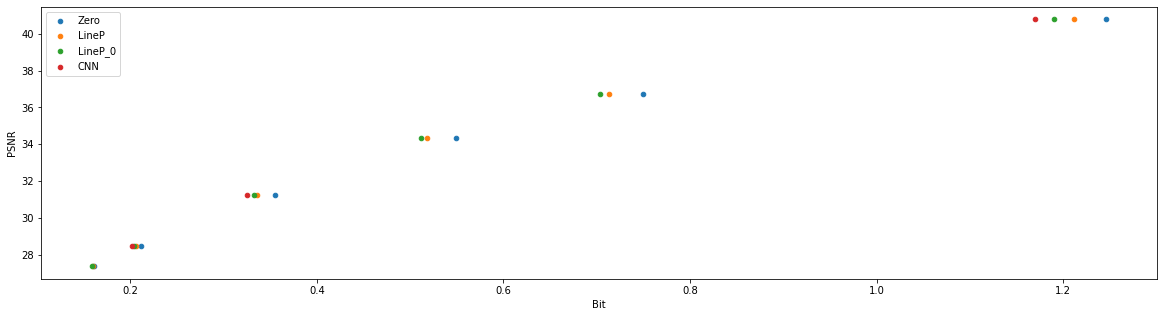

In [147]:
# 10 20 30 50 80 100
y=[40.782311,36.742401,34.3347840,31.228683,28.475659,27.363759]

x1=[1.24598694,0.74929810,0.54940796,0.3548278,0.21194458,0.16079712]
x2=[1.21177673,0.71305847,0.51844788,0.33593750,0.20570374,0.16017151]
x3=[1.19046021,0.70359802,0.51188660,0.3329010,0.20356750,0.15852356]

x4=[1.16993713,0.32563782,0.20152283]
y4=[40.782311,31.228683,28.475659]

ss=21

plt.figure(figsize=(20,5))
plt.scatter(x1,y,label="Zero",s=ss)
plt.scatter(x2,y,label="LineP",s=ss)
plt.scatter(x3,y,label="LineP_0",s=ss)
plt.scatter(x4,y4,label="CNN",s=ss)
# plt.scatter(x5,y5,label="CNN_tan",s=ss)
plt.xlabel("Bit")
plt.ylabel("PSNR")
# plt.xscale("log")
plt.legend()
plt.show()

In [ ]:
/

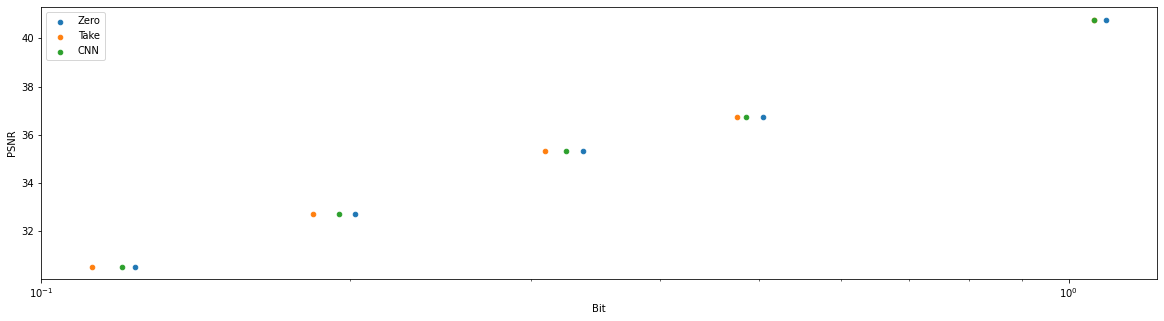

In [1]:
import matplotlib.pyplot as plt

# 10 20 30 50 80 100
y=[40.782311,36.742401,35.3347840,32.7,30.528683]
x1=[1.059,0.476,0.309,0.184,0.112]
x4=[1.066,0.477,0.312,0.186,0.114]
/
x2=[1.05768,0.4855995,0.32432,0.19490433,0.11978]
x3=[1.088, 0.5047, 0.3370, 0.202, 0.12343597]


ss=21

plt.figure(figsize=(20,5))
plt.scatter(x3,y,label="Zero",s=ss)
plt.scatter(x1,y,label="Take",s=ss)
plt.scatter(x2,y,label="CNN",s=ss)
# plt.scatter(x5,y5,label="CNN_tan",s=ss)
plt.xlabel("Bit")
plt.ylabel("PSNR")
plt.xscale("log")
plt.legend()
plt.show()

In [ ]:
===================varH = 25218.000000,  varDH = 67232.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 1.85675049(1.926) 
===================varH = 25538.000000,  varDH = 68393.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 1.88246155(1.952) 
===================varH = 25115.000000,  varDH = 72238.000000 
=====ppwContext->arithRate, ppwContext->spihtRate: 1.85935974(1.921) 

In [ ]:

varH = 15706.000000,  varDH = 44031.000000 0
varH = 15510.000000,  varDH = 38146.000000 lineP
varH = 15279.000000,  varDH = 37429.000000 lineP_0


In [48]:
(torch.tensor([1.8])+0.5)//1

tensor([2.])

Boat
q=50
31.228683 at 0.35482788(0.367) 0
25.609376 at 0.32940674(0.345) LineP
26.804441 at 0.36174011(0.376) my lv5 norm

q=30

34.334784 at 0.54940796(0.567)  0
28.544027 at 0.51005554(0.531)  LineP
  my

q=10
40.782311 at 1.24598694(1.287) 0
33.562756 at 1.18949890(1.236) LineP
35.230403 at 1.24766541(1.291) my Norm 5

Lenna
q=10
40.742675 at 1.34902954(1.393) sqrt(varH) = 8360.691577 0
40.742675 at 1.36962891(1.417) sqrt(varDH) = 7945.720206  LineP
40.742675 at 1.36219788(1.409) sqrt(varDH) = 8392.344365  my Norm

q=50

Barbara
q=10
39.755350 at 1.85935974(1.921) sqrt(varH) = 8011.743679 0
39.755350 at 1.88267517(1.952) sqrt(varDH) = 7747.423349 LineP
39.755350 at 1.87809753(1.943) sqrt(varDH) = 8191.751315 my Norm